https://www.kaggle.com/tawsifurrahman/covid19-radiography-database/data


https://colab.research.google.com/drive/1WVKhxnCpGilNSYH_RXelVBMbJ20Xt7WJ

https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751





In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import  Dropout, Dense,GlobalMaxPooling2D, AveragePooling2D, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
def plot_acc_loss(result, epochs):
    acc = result.history['accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_accuracy']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
mypath = '/content/gdrive/My Drive/Colab Notebooks/COVID-19 Radiography Database/'

In [0]:
# In Python, the glob module is used to retrieve files/pathnames matching a specified pattern.
from glob import glob
import cv2

In [0]:
filenames = glob(mypath + 'COVID-19/' + '*.png')
np.random.shuffle(filenames)
covid_images = [cv2.resize(cv2.imread(img), (224,224)) for img in filenames]

In [0]:
filenames = glob(mypath + 'NORMAL/' + '*.png')
np.random.shuffle(filenames)
normal_images = [cv2.resize(cv2.imread(img), (224,224)) for img in filenames[:219]]

In [0]:
filenames = glob(mypath + 'Viral Pneumonia/' + '*.png')
np.random.shuffle(filenames)
pneu_images = [cv2.resize(cv2.imread(img), (224,224)) for img in filenames[:219]]

# Convolutional Neural Network for 2-class Classification

In [0]:
X = np.array(normal_images + covid_images).astype('float32')/255
Y = np.array([0]*219 + [1]*219)
#Y = tf.keras.utils.to_categorical(Y, num_classes=2)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [0]:
model = Sequential()
model.add(Conv2D(64,(5,5), activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

In [0]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6),  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 32)      51232     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 89888)             0         
_________________________________________________________________
dropout (Dropout)            (None, 89888)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1

In [0]:
history = model.fit(x_train, y_train, batch_size=10, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
25/25 [==============================] - 1s 27ms/step - loss: 0.6582 - accuracy: 0.5902 - val_loss: 0.4794 - val_accuracy: 0.9194
Epoch 2/30
25/25 [==============================] - 0s 17ms/step - loss: 0.3600 - accuracy: 0.9016 - val_loss: 0.2937 - val_accuracy: 0.8387
Epoch 3/30
25/25 [==============================] - 0s 17ms/step - loss: 0.2384 - accuracy: 0.8934 - val_loss: 0.1799 - val_accuracy: 0.9516
Epoch 4/30
25/25 [==============================] - 0s 18ms/step - loss: 0.1467 - accuracy: 0.9426 - val_loss: 0.1547 - val_accuracy: 0.9355
Epoch 5/30
25/25 [==============================] - 0s 17ms/step - loss: 0.0999 - accuracy: 0.9754 - val_loss: 0.1341 - val_accuracy: 0.9677
Epoch 6/30
25/25 [==============================] - 0s 17ms/step - loss: 0.0983 - accuracy: 0.9590 - val_loss: 0.1511 - val_accuracy: 0.9677
Epoch 7/30
25/25 [==============================] - 0s 17ms/step - loss: 0.0768 - accuracy: 0.9672 - val_loss: 0.1773 - val_accuracy: 0.9516
Epoch 8/30
25

In [0]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 13ms/step - loss: 0.0980 - accuracy: 0.9545


[0.09795182198286057, 0.9545454382896423]

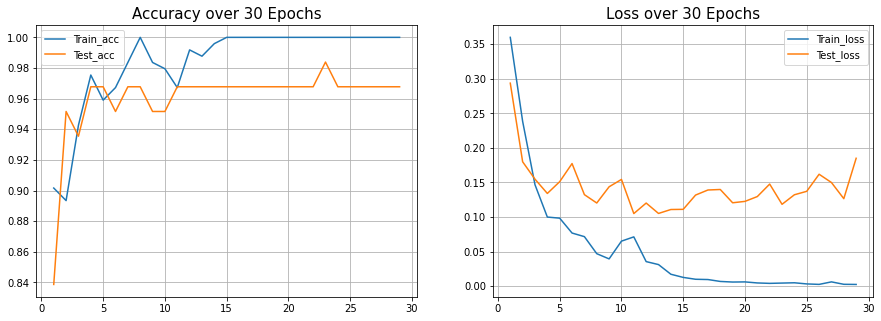

In [0]:
plot_acc_loss(history, 30)

#  Convolutional Neural Network for 3-class Classification

In [0]:
X = np.array(normal_images + covid_images + pneu_images).astype('float32')/255
Y = np.array([0]*219 + [1]*219 + [2]*219)
#Y = tf.keras.utils.to_categorical(Y, num_classes=2)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [0]:
model = Sequential()
model.add(Conv2D(64,(5,5), activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

In [0]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6),  metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 220, 220, 64)      4864      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 106, 106, 32)      51232     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 53, 53, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 89888)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 16)                1438224   
_________________________________________________________________
dropout_13 (Dropout)         (None, 16)              

In [0]:
history = model.fit(x_train, y_train, batch_size=20, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
19/19 [==============================] - 1s 33ms/step - loss: 1.0130 - accuracy: 0.4469 - val_loss: 0.9207 - val_accuracy: 0.5000
Epoch 2/50
19/19 [==============================] - 1s 28ms/step - loss: 0.8544 - accuracy: 0.5777 - val_loss: 0.7636 - val_accuracy: 0.5326
Epoch 3/50
19/19 [==============================] - 1s 28ms/step - loss: 0.7390 - accuracy: 0.6567 - val_loss: 0.6756 - val_accuracy: 0.7065
Epoch 4/50
19/19 [==============================] - 1s 29ms/step - loss: 0.6615 - accuracy: 0.6975 - val_loss: 0.5845 - val_accuracy: 0.7826
Epoch 5/50
19/19 [==============================] - 1s 28ms/step - loss: 0.6175 - accuracy: 0.7330 - val_loss: 0.6298 - val_accuracy: 0.7391
Epoch 6/50
19/19 [==============================] - 1s 29ms/step - loss: 0.4795 - accuracy: 0.8229 - val_loss: 0.4268 - val_accuracy: 0.8478
Epoch 7/50
19/19 [==============================] - 1s 29ms/step - loss: 0.4534 - accuracy: 0.8311 - val_loss: 0.4253 - val_accuracy: 0.8696
Epoch 8/50
19

In [0]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 13ms/step - loss: 0.3797 - accuracy: 0.9192


[0.37968382239341736, 0.9191918969154358]

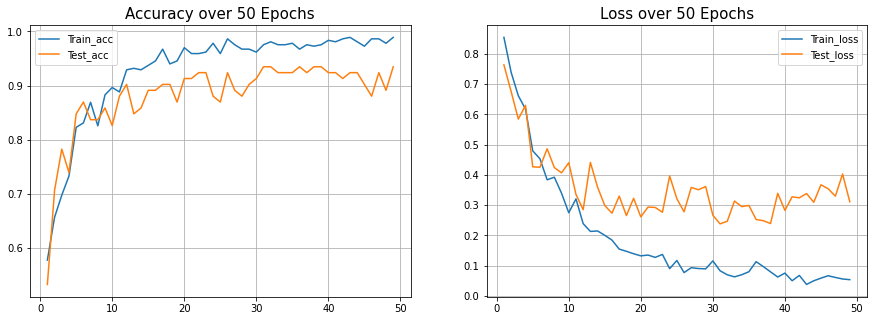

In [0]:
plot_acc_loss(history, 50)

# Binary Classification Between Normal and COVID-19


*   0 -> normal
*   1 -> covid-19



In [0]:
X = np.array(normal_images + covid_images).astype('float32')/255
Y = np.array([0]*219 + [1]*219)
#Y = tf.keras.utils.to_categorical(Y, num_classes=2)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [0]:
pre_trained_model = VGG16(input_shape=(224,224,3), include_top=False, weights="imagenet")

In [0]:
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

We cannot say that a particular pooling method is better over other generally. The choice of pooling operation is made based on the data at hand. Average pooling method smooths out the image and hence the sharp features may not be identified when this pooling method is used.
Max pooling selects the brighter pixels from the image. It is useful when the background of the image is dark and we are interested in only the lighter pixels of the image. For example: in MNIST dataset, the digits are represented in white color and the background is black. So, max pooling is used. Similarly, min pooling is used in the other way round.

In [0]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
#x = AveragePooling2D(pool_size=(4, 4))(last_output)
# Add a fully connected layer with  ReLU activation
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.25)(x)
# Add a final softmax layer for classification
x = Dense(2, activation='softmax')(x)

model = tf.keras.models.Model(pre_trained_model.input, x)
#model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),  metrics=['accuracy'])
#model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),  metrics=['accuracy'])
#model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),  metrics=['accuracy'])
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6),  metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
history = model.fit(x_train, y_train, batch_size=10, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
25/25 [==============================] - 1s 55ms/step - loss: 0.2823 - accuracy: 0.8689 - val_loss: 0.0909 - val_accuracy: 0.9839
Epoch 2/30
25/25 [==============================] - 1s 48ms/step - loss: 0.0725 - accuracy: 0.9672 - val_loss: 0.3671 - val_accuracy: 0.8548
Epoch 3/30
25/25 [==============================] - 1s 48ms/step - loss: 0.0570 - accuracy: 0.9836 - val_loss: 0.0617 - val_accuracy: 0.9516
Epoch 4/30
25/25 [==============================] - 1s 48ms/step - loss: 0.0514 - accuracy: 0.9918 - val_loss: 0.0374 - val_accuracy: 0.9839
Epoch 5/30
25/25 [==============================] - 1s 48ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 6/30
25/25 [==============================] - 1s 48ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 7/30
25/25 [==============================] - 1s 48ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 8/30
25

In [0]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 51ms/step - loss: 0.0560 - accuracy: 0.9924


[0.05596194788813591, 0.9924242496490479]

In [0]:
y_pred = np.argmax(model.predict(x_test), axis = 1)

In [0]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        70
           1       1.00      0.98      0.99        62

    accuracy                           0.99       132
   macro avg       0.99      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132

[[70  0]
 [ 1 61]]


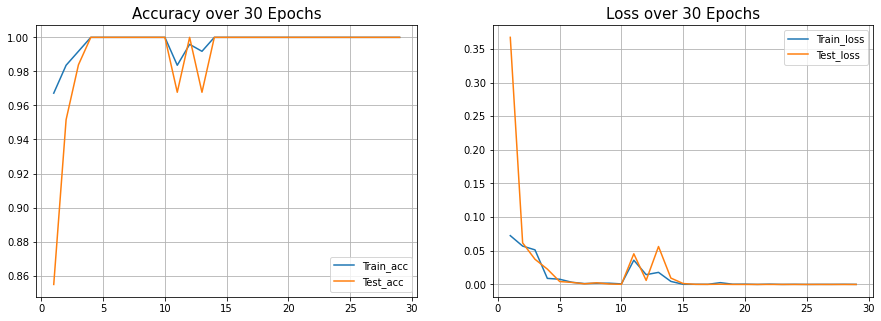

In [0]:
plot_acc_loss(history, len(history.epoch))

# Classification Between Normal, COVID-19, and Pneumonia


*   0 -> normal
*   1 -> covid-19
*  2 -> Pneumonia



In [0]:
X = np.array(normal_images + covid_images + pneu_images).astype('float32')/255
Y = np.array([0]*219 + [1]*219 + [2]*219)
#Y = tf.keras.utils.to_categorical(Y, num_classes=2)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [0]:
pre_trained_model = VGG16(input_shape=(224,224,3), include_top=False, weights="imagenet")

In [0]:
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

We cannot say that a particular pooling method is better over other generally. The choice of pooling operation is made based on the data at hand. Average pooling method smooths out the image and hence the sharp features may not be identified when this pooling method is used.
Max pooling selects the brighter pixels from the image. It is useful when the background of the image is dark and we are interested in only the lighter pixels of the image. For example: in MNIST dataset, the digits are represented in white color and the background is black. So, max pooling is used. Similarly, min pooling is used in the other way round.

In [0]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
#x = AveragePooling2D(pool_size=(4, 4))(last_output)
# Add a fully connected layer with  ReLU activation
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.25)(x)
# Add a final softmax layer for classification
x = Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(pre_trained_model.input, x)
#model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),  metrics=['accuracy'])
#model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),  metrics=['accuracy'])
#model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),  metrics=['accuracy'])
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6),  metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
history = model.fit(x_train, y_train, batch_size=10, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
37/37 [==============================] - 2s 62ms/step - loss: 0.6544 - accuracy: 0.6948 - val_loss: 0.3415 - val_accuracy: 0.8913
Epoch 2/30
37/37 [==============================] - 2s 49ms/step - loss: 0.3246 - accuracy: 0.8747 - val_loss: 0.1604 - val_accuracy: 0.9457
Epoch 3/30
37/37 [==============================] - 2s 49ms/step - loss: 0.1459 - accuracy: 0.9373 - val_loss: 0.1470 - val_accuracy: 0.9674
Epoch 4/30
37/37 [==============================] - 2s 49ms/step - loss: 0.1059 - accuracy: 0.9564 - val_loss: 0.1389 - val_accuracy: 0.9457
Epoch 5/30
37/37 [==============================] - 2s 49ms/step - loss: 0.0862 - accuracy: 0.9782 - val_loss: 0.1734 - val_accuracy: 0.9457
Epoch 6/30
37/37 [==============================] - 2s 49ms/step - loss: 0.0574 - accuracy: 0.9782 - val_loss: 0.1196 - val_accuracy: 0.9674
Epoch 7/30
37/37 [==============================] - 2s 49ms/step - loss: 0.0237 - accuracy: 0.9918 - val_loss: 0.1128 - val_accuracy: 0.9674
Epoch 8/30
37

In [0]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 1s 99ms/step - loss: 0.1459 - accuracy: 0.9646


[0.14590997993946075, 0.9646464586257935]

In [0]:
y_pred = np.argmax(model.predict(x_test), axis = 1)

In [0]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       0.97      0.95      0.96        61
           2       0.97      0.94      0.95        63

    accuracy                           0.96       198
   macro avg       0.96      0.96      0.96       198
weighted avg       0.96      0.96      0.96       198

[[74  0  0]
 [ 1 58  2]
 [ 2  2 59]]


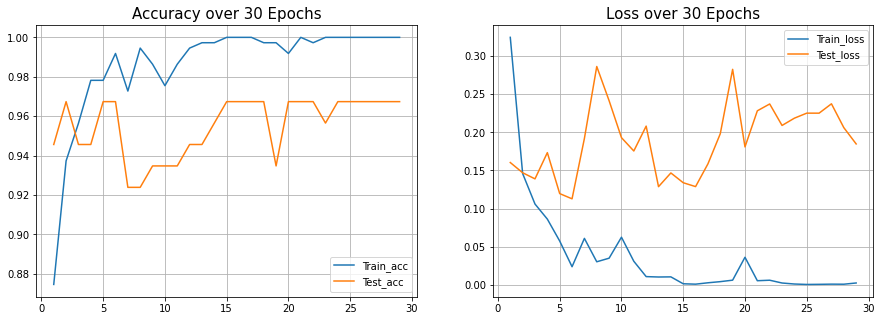

In [0]:
plot_acc_loss(history, len(history.epoch))